In [72]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [73]:
ca = pd.read_csv('dogma4.csv')
ca.head(12)

,2022-11-01,1,0,0.1,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0.1,0.0.2,0.0.3,0.0.4,...,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552,0.2562613816564786
0,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,5.903704e+06,5.903704e+06,5.903704e+06,362.000000,362.000000,362.000000,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
1,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
2,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258682
3,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.254164
4,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,1.085000e+07,1.085000e+07,1.085000e+07,362.000000,362.000000,362.000000,1.085000e+07,1.085000e+07,1.085000e+07,0.318994
5,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258853
6,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
7,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.266285
8,2022-02-01,19,0,0,0b498e8a-7c01-466d-b112-0c5785574f45,0.0,1.0,1.0,1.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
9,2022-02-01,21,0,0,0c6cc76e-bd09-4eec-b4c8-4ef642923b06,0.0,2.0,2.0,2.0,2.0,...,4.818792e+06,4.818792e+06,4.818792e+06,240.000000,240.000000,240.000000,4.818792e+06,4.818792e+06,4.818792e+06,0.256261


In [74]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Columns: 164 entries, 2022-11-01 to 0.2562613816564786
dtypes: float64(159), int64(3), object(2)
memory usage: 12.9+ MB


In [75]:
threshold = 0.52
ca = ca.loc[:, ca.isnull().mean(axis=0) < threshold]

In [76]:
threshold = 0.52
ca = ca[ca.isnull().mean(axis=1) < threshold]

In [77]:
ca.head(8)

,2022-11-01,1,0,0.1,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0.1,0.0.2,0.0.3,0.0.4,...,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552,0.2562613816564786
0,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,5.903704e+06,5.903704e+06,5.903704e+06,362.000000,362.000000,362.000000,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
1,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
2,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258682
3,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.254164
4,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,1.085000e+07,1.085000e+07,1.085000e+07,362.000000,362.000000,362.000000,1.085000e+07,1.085000e+07,1.085000e+07,0.318994
5,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258853
6,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
7,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.266285


<Figure size 1000x100 with 0 Axes>

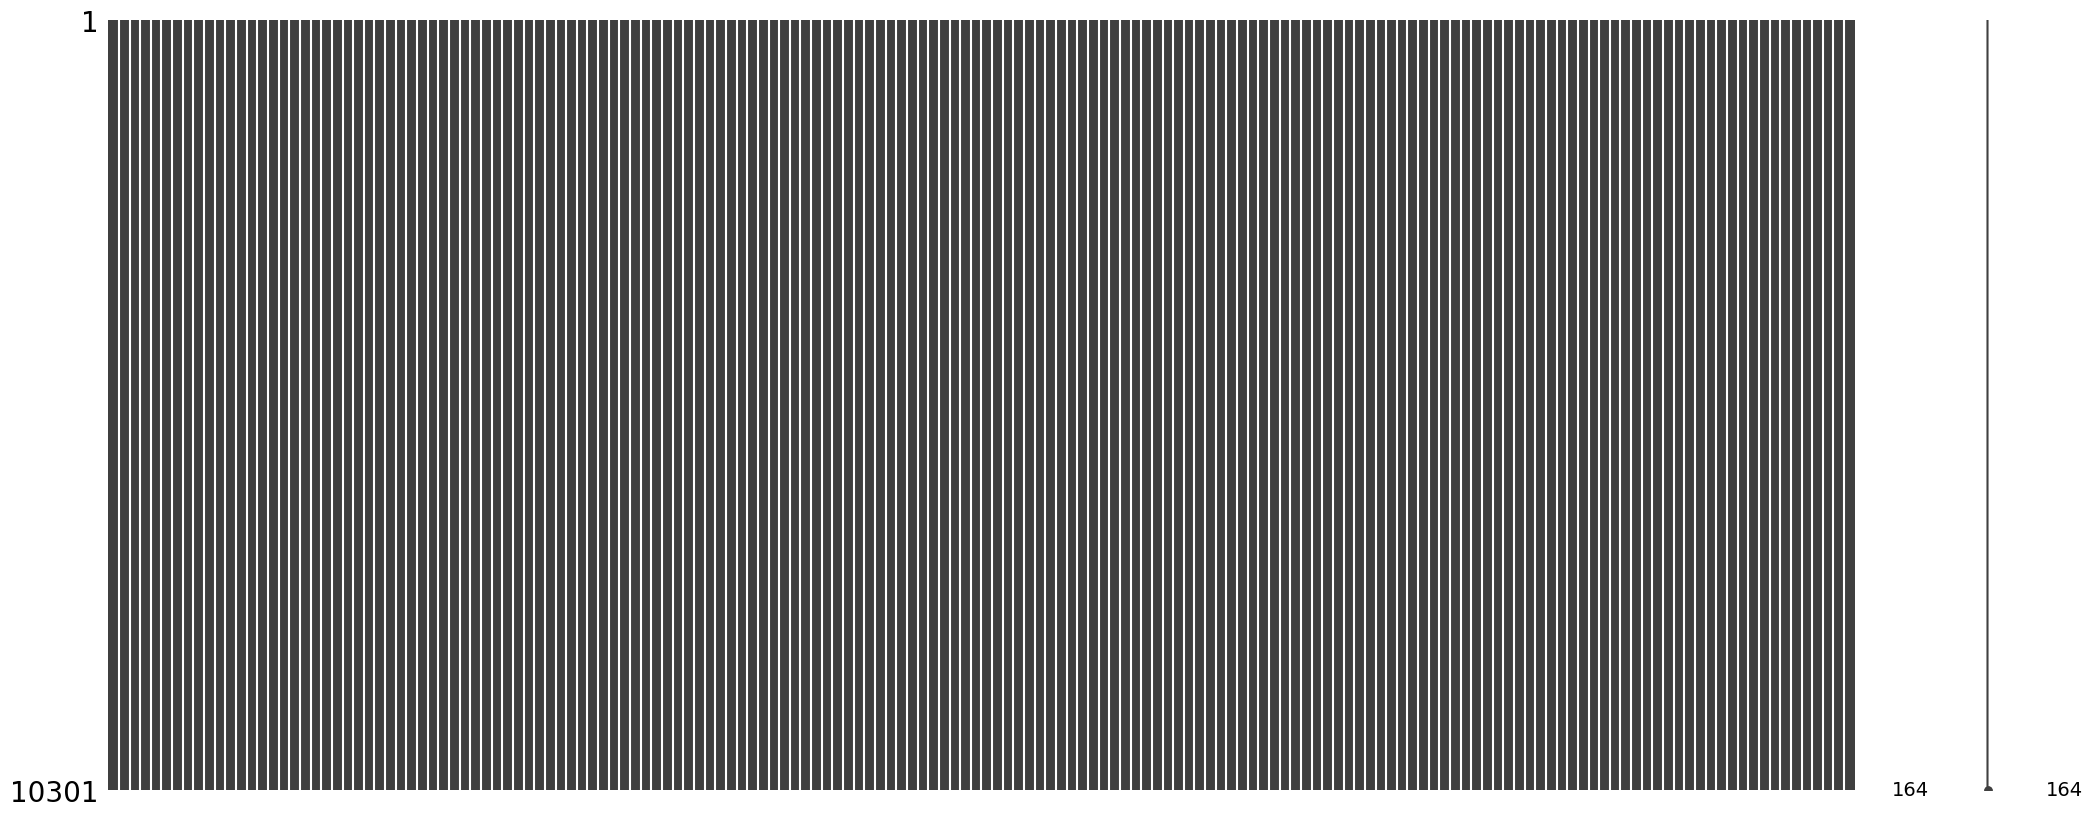

In [78]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [79]:
unique_columns = ca.T.drop_duplicates().T



In [80]:
unique_columns = ca.T.drop_duplicates().T

# Перезапись файла
unique_columns.to_csv('dogma4.csv', index=False)

In [81]:
numeric_cols = ca.select_dtypes(include='number').columns  # Выбираем только числовые столбцы
ca[numeric_cols] = ca[numeric_cols].fillna(ca[numeric_cols].mean())  # Заполняем пустые значения средним

# Перезапись файла
ca.to_csv('dogma4.csv', index=False)

<Figure size 1000x100 with 0 Axes>

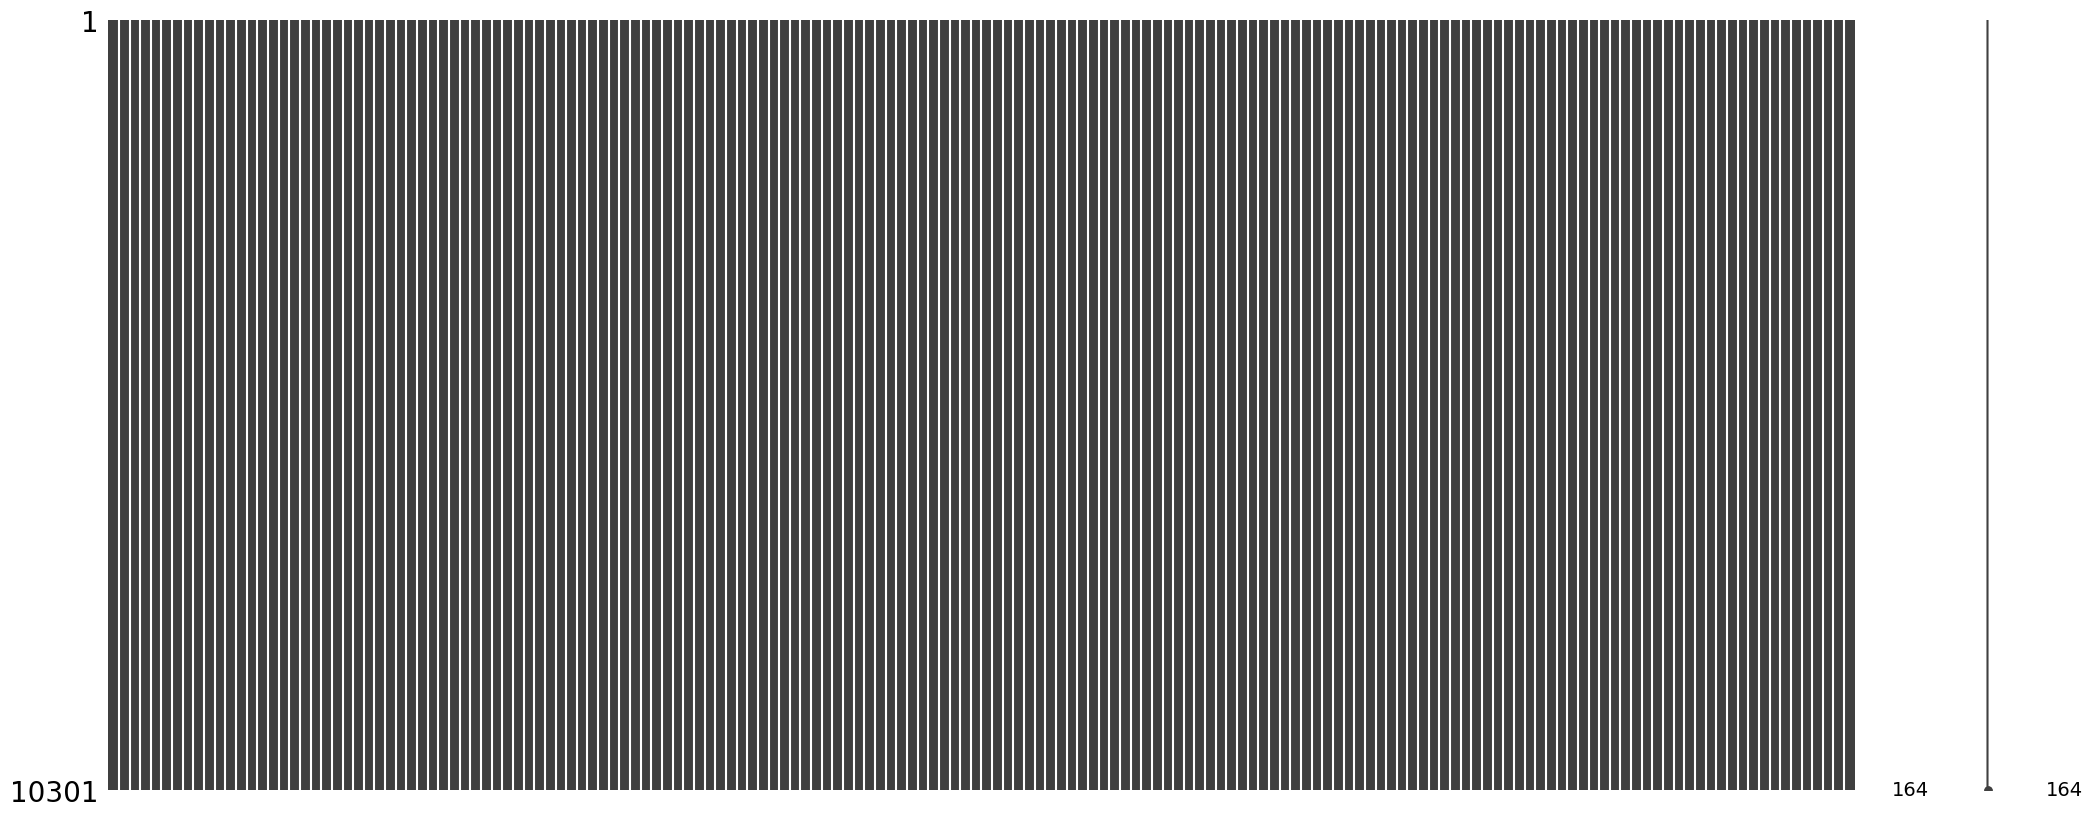

In [82]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [83]:
ca.head(8)

,2022-11-01,1,0,0.1,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0.1,0.0.2,0.0.3,0.0.4,...,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552,0.2562613816564786
0,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,5.903704e+06,5.903704e+06,5.903704e+06,362.000000,362.000000,362.000000,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
1,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
2,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258682
3,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.254164
4,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,1.085000e+07,1.085000e+07,1.085000e+07,362.000000,362.000000,362.000000,1.085000e+07,1.085000e+07,1.085000e+07,0.318994
5,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258853
6,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
7,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.266285
